# Pymaceuticals Inc.
---

### Analysis

- Looking at all the data provided, I was able to see how each medicine worked on the tumor size for each mouse in the study. Further in the data into the bar graphs I saw that Ramicane and Capomulin were doing really well in their treatments. Overall it looks like Capomulin had an amazing effect on the tumor size in the mice that were treated with it. While doing the scatter plot it did look like there was a positive relationship with mouse weight and tumor size. I did a line regression on the scatter plot and it produced a 0.84 correlation coeeficient. That signifies a high correlation between the two. Overall Capomulin would be a medicine I would recommend further research on. But, without running the rest of the medicine through the same procedures we wont know if any of the others show similar or better results.
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
remerge_df = merge_df.rename(columns={'Mouse ID':'Mouse_ID','Tumor Volume (mm3)':'Tumor Volume'})
#merge_df.head()
# Display the data table for preview
#remerge_df.reset_index(drop=True).head()
remerge_df

,Mouse_ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = remerge_df['Mouse_ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
remerge_df.Mouse_ID.duplicated()
remerge_df.loc[remerge_df.duplicated(),'Mouse_ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
bad_mouse = 'g989'
mask = remerge_df['Mouse_ID']!= bad_mouse
clean_mice = remerge_df[mask]
clean_mice.head()

,Mouse_ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
less_mice = clean_mice['Mouse_ID'].nunique()
less_mice

248

In [7]:
meandrugs = clean_mice.groupby('Drug Regimen')['Tumor Volume'].mean()
meddrugs = clean_mice.groupby('Drug Regimen')['Tumor Volume'].median()
vardrugs = clean_mice.groupby('Drug Regimen')['Tumor Volume'].var()
stddrugs = clean_mice.groupby('Drug Regimen')['Tumor Volume'].std()
errdrugs = clean_mice.groupby('Drug Regimen')['Tumor Volume'].sem()
errdrugs

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume, dtype: float64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg = pd.DataFrame({
    'Mean Tumor Volume' : meandrugs,
    'Median Tumor Volume' : meddrugs,
    'Tumor Volume Variance' : vardrugs,
    'Tumor Volume Std. Dev.' : stddrugs,
    'Tumor Volume Std. Err' : errdrugs
    
})
drug_reg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = clean_mice.groupby('Drug Regimen')['Tumor Volume'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

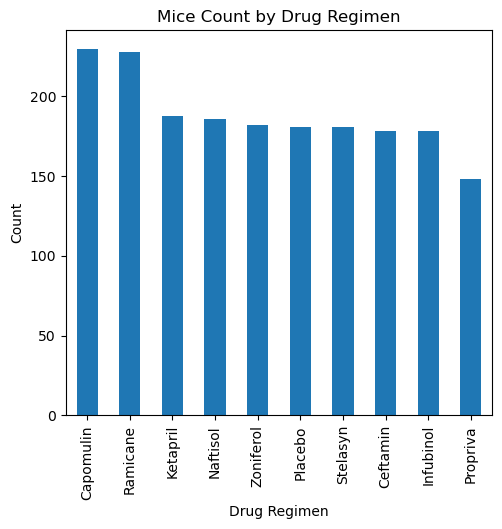

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
lapras = clean_mice.groupby('Drug Regimen')['Drug Regimen'].size()
mouseortime_reg = clean_mice.groupby('Drug Regimen')['Mouse_ID'].count()

# Sort mouseortime_reg in descending order
mouseortime_reg = mouseortime_reg.sort_values(ascending=False)

mouseortime_reg.plot(kind='bar', figsize=(5.5, 5))

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Mice Count by Drug Regimen')

# Display the plot
plt.show()


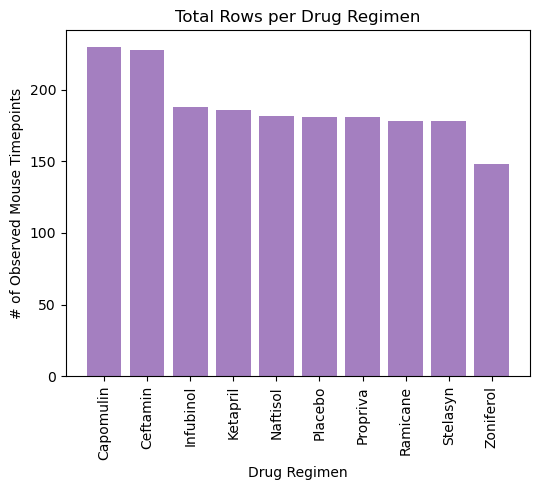

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = range(len(lapras))
tick_labels = lapras.index

plt.figure(figsize=(5.5, 5))

plt.bar(x_axis, mouseortime_reg, color='indigo', alpha=0.5, align='center')

plt.xticks(x_axis, tick_labels, rotation='vertical')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Rows per Drug Regimen')

plt.tight_layout()
plt.show()


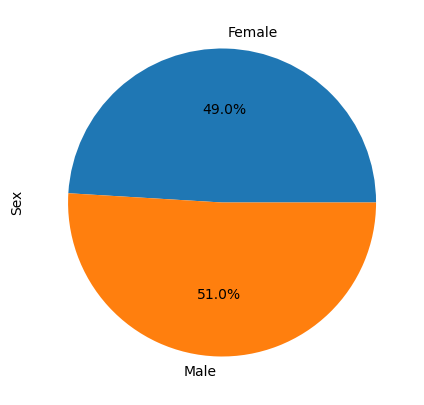

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
shinx = clean_mice.groupby('Sex')['Sex'].size()
abra = clean_mice.groupby('Sex')['Mouse_ID'].count()
ekans = shinx.plot.pie(y='Mouse_ID', figsize=(5,5),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1eeba4ae320>,
 [Text(-0.681404241901343, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370961, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

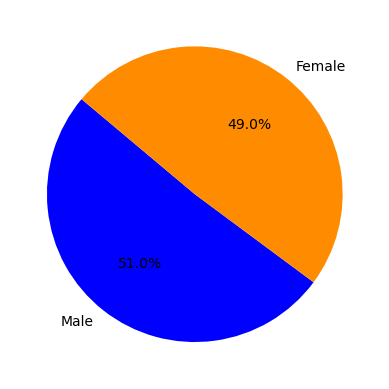

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ['Male','Female']
size = [958,922]
color = ["blue","darkorange"]
explode = (0,0)
plt.pie(size, explode=explode, labels=sex, colors=color,
        autopct="%1.1f%%", startangle=140)

In [14]:
dolliv = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
flygon = clean_mice.loc[clean_mice['Drug Regimen'].isin(dolliv)]
flygon

,Mouse_ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
turtwig = clean_mice.groupby('Mouse_ID')['Timepoint'].max().reset_index()
flygon = pd.merge(turtwig, clean_mice, on=['Mouse_ID', 'Timepoint'], how='left')[['Mouse_ID', 'Drug Regimen', 'Tumor Volume']]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
flygon = flygon[flygon['Drug Regimen'].isin(treatment_regimens)]
flygon

,Mouse_ID,Drug Regimen,Tumor Volume
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
238,y769,Ceftamin,68.594745
239,y793,Capomulin,31.896238
240,y865,Ceftamin,64.729837
244,z578,Ramicane,30.638696


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_mice[clean_mice['Drug Regimen'] == treatment]['Tumor Volume']
    
    # add subset 
    tumor_vol_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume, dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume, dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume, dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume, dtype: float64)


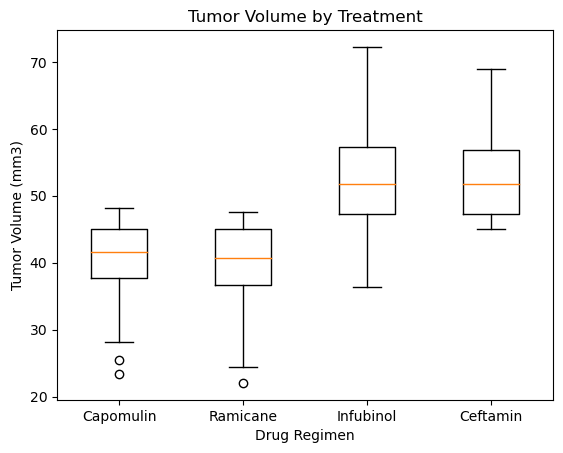

In [64]:
plt.boxplot(tumor_vol_data, labels=treatments)

# Set the title and labels
plt.title('Tumor Volume by Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

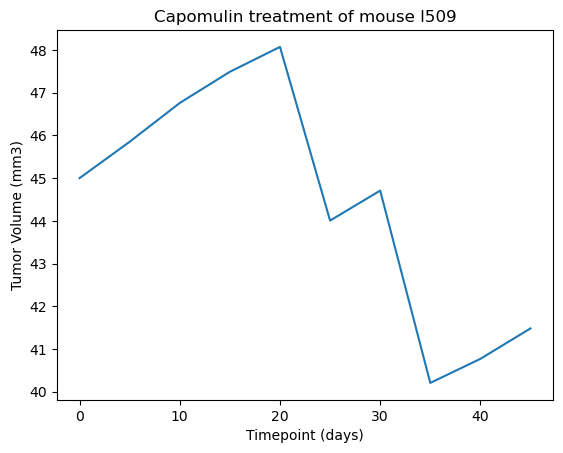

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = kirlia['Mouse_ID'].unique()[0]
pikachu = kirlia.loc[kirlia['Mouse_ID'] == mouse]

x_values = pikachu['Timepoint']
y_values = pikachu['Tumor Volume']

plt.plot(x_values, y_values)

plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

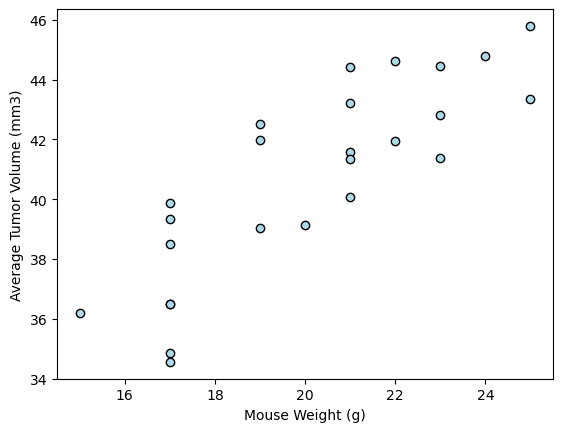

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
chimecho = kirlia[kirlia['Drug Regimen'] == 'Capomulin']

tauros = chimecho.groupby('Mouse_ID')['Tumor Volume'].mean()
muk = chimecho.groupby('Mouse_ID')['Weight (g)'].unique().str[0]

plt.scatter(muk, tauros, marker='o', facecolors='lightblue', edgecolors='black')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84


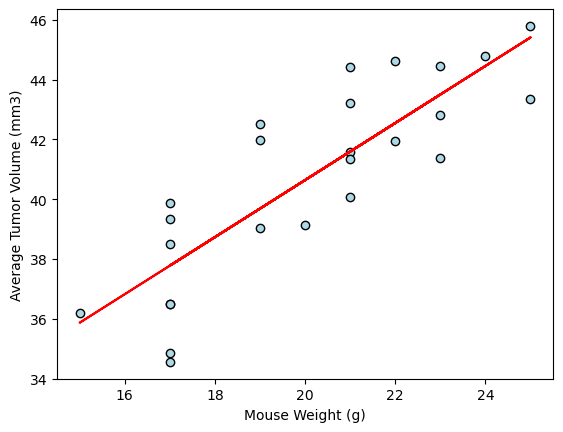

In [79]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
chimecho = kirlia[kirlia['Drug Regimen'] == 'Capomulin']

tauros = chimecho.groupby('Mouse_ID')['Tumor Volume'].mean()
muk = chimecho.groupby('Mouse_ID')['Weight (g)'].unique().str[0]

plt.scatter(muk, tauros, marker='o', facecolors='lightblue', edgecolors='black')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation coefficient
cubone = np.corrcoef(muk, tauros)[0,1]
crobat = round(cubone, 2)
print("Correlation Coefficient:", crobat)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(muk, tauros)

# Create the regression line
regression_line = slope * muk + intercept

# Plot the regression line
plt.plot(muk, regression_line, color='red')

# Display the scatter plot with the regression line
plt.show()
